<a href="https://colab.research.google.com/github/Saeed-Akbari/CS5783-MachineLearning/blob/main/Assignment4/problem3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load data

# Change the paths to where you have saved the input files.
path="/content/drive/MyDrive/machineLearning/Assignment4/"
#path="/content/drive/MyDrive/"

dfTrain = pd.read_excel(path+"Asssignment4_Data.xlsx", sheet_name= "Train")
dfTest  = pd.read_excel(path+"Asssignment4_Data.xlsx", sheet_name= "Test" )

In [4]:
# Make four numpy arrays for features and labels of the training and test sets.

xtrain = dfTrain.drop(["House ID", "Construction type"], axis=1).to_numpy()
xtest = dfTest.drop(["House ID", "Construction type"], axis=1).to_numpy()

labelsTrain = dfTrain.iloc[: , -1].to_numpy()
labelsTest = dfTest.iloc[: , -1].to_numpy()

b, ytrain = np.unique(labelsTrain, return_inverse=True)
ytest = np.zeros_like(labelsTest)
for i in range (len(b)):
  ytest[labelsTest==b[i]]= i

In [5]:
# take mean and standard deviation of features of the training set for standardization
meanX = np.mean(xtrain, axis=0)
stdX = np.std(xtrain, axis=0)
# standardize features of the trainig set
xtrainSt = (xtrain - meanX) / stdX

# standardize features of the test set
xtestSt = (xtest - meanX) / stdX

In [6]:
def acc(y_pred, y_test):

  accuracy = sum(y_pred == y_test) / len(y_test)
  return accuracy

In [7]:
class KNNclassifier:

    def __init__(self, k, X_train, y_train):
        self.k = k
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):

        m = self.X_train.shape[0]
        n = X_test.shape[0]
        y_pred = []

        # Calculating distances  
        for i in range(n):  # for every sample in X_test
            distance = []  # To store the distances
            for j in range(m):  # for every sample in X_train
                d = (np.sqrt(np.sum(np.square(X_test[i,:] - self.X_train[j,:]))))  # Euclidean distance
                distance.append((d, self.y_train[j]))    
            distance = sorted(distance) # sorting distances in ascending order

            # Getting k nearest neighbors
            neighbors = []
            for item in range(self.k):
                neighbors.append(distance[item][1])  # appending K nearest neighbors

            # Making predictions
            y_pred.append(mode(neighbors)[0][0])  # For Classification
        return y_pred

In [8]:
# Calculating accuracy
predictionsTest = []
predictionsTrain = []
accuraciesTest = []
accuraciesTrain = []
ks = range(1, 10)

for k in ks:

    bknn = KNNclassifier(k, xtrainSt, ytrain)
    # predicting
    y_pred_train = bknn.predict(xtrainSt)
    y_pred_test = bknn.predict(xtestSt)

    accuracyTrain = acc(y_pred_train, ytrain)
    accuracyTest = acc(y_pred_test, ytest)

    accuraciesTrain.append(accuracyTrain)
    accuraciesTest.append(accuracyTest)

    predictionsTrain.append(b[y_pred_train])
    predictionsTest.append(b[y_pred_test])

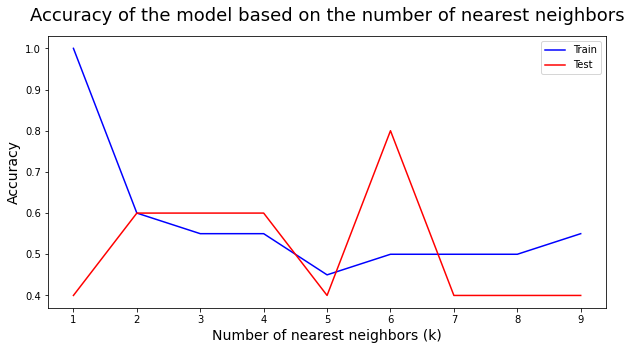

In [9]:
# Plotting accuracy curve
plt.figure(figsize=(10, 5))
plt.plot(ks, accuraciesTrain, color='b', label="Train")
plt.plot(ks, accuraciesTest, color='r', label="Test")
plt.xlabel('Number of nearest neighbors (k)', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy of the model based on the number of nearest neighbors', fontsize=18, pad=15)
plt.legend()
plt.show()

In [10]:
print("labels of the test set", b[ytest.astype('int32')])
print("The prediction with k=6", predictionsTest[5])
print("The prediction with k=4", predictionsTest[3])

labels of the test set ['Apartment' 'House' 'House' 'Apartment' 'Apartment']
The prediction with k=6 ['Apartment' 'House' 'House' 'Apartment' 'House']
The prediction with k=4 ['Apartment' 'Apartment' 'House' 'Apartment' 'House']


Increasing k from 1 to 5 increase the bias. Increasing k from 1 to 2 decrease the variance. The variance is constant for k from 2 to 4. Then, it starts decreasing as k increases to 5. To choose the best k, one must begin with low values for k and gradually increases k to get the best balance of bias and variance.